In [1]:
import xfelmay2019 as xfel

# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

Welcome to xfelmay2019 version 0+untagged.106.g2671193.dirty


# Global variables to define

In [2]:
comissioningPath='/gpfs/exfel/exp/SQS/201921/p002430/raw'
methanePath ='/gpfs/exfel/exp/SQS/201802/p002176/raw'
samplePath = '/gpfs/exfel/exp/SQS/201802/p002176/scratch'

# Grab image based on tid and plot +1,0,-1 train ids from that point

In [4]:
path='/gpfs/exfel/exp/SQS/201921/p002430/raw'
# runNum = 197
# pid = 103160781
runNum = 202
tid = 103174385

run = xfel.runFormat( runNum )
runData = kd.RunDirectory(path+run)

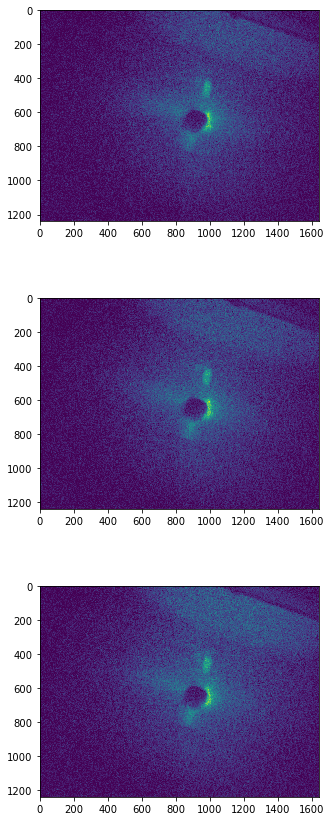

In [8]:
dataCollection = runData.select_trains(kd.by_id[tid-2:tid+3])

fig,ax = plt.subplots(3, figsize=(5,15))
for idx,atid in enumerate(range(tid-1,tid+2)):
    
    data = dataCollection.train_from_id(atid)
    image = data[1]['SQS_DPU_LIC/CAM/YAG_UPSTR:daqOutput']['data.image.pixels']
    ax[idx].imshow(image)

# Average image from run

In [4]:
scatMean = xfel.analyzeAverageImage( runNumber=3, path=methanePath)

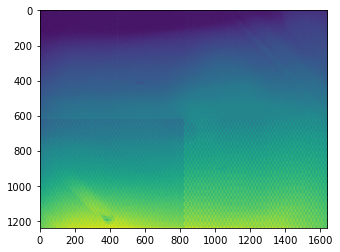

In [5]:
plt.imshow(scatMean)

# Maximum and average image from run

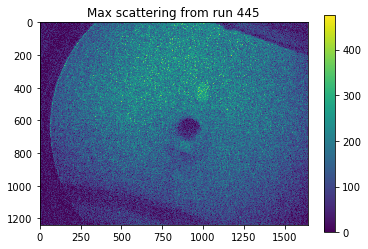

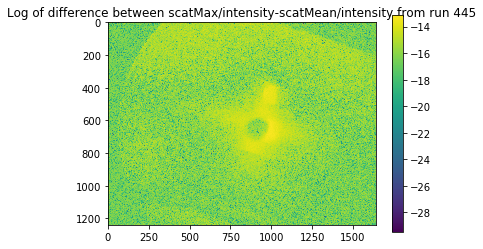

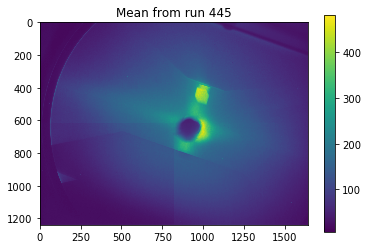

In [3]:
scatMax, trainId = xfel.analyzeMaximumImage( runNumber=445)

# Twenty brightest images from run

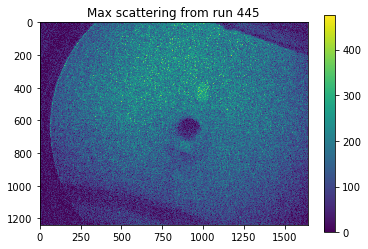

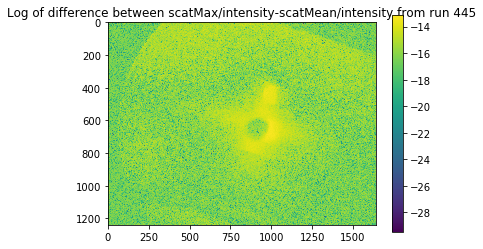

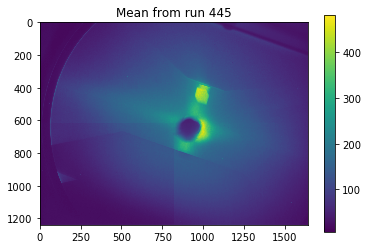

In [3]:
scatMax, trainId = xfel.analyzeMaximumImage( runNumber=445)

# Twenty largest images from run

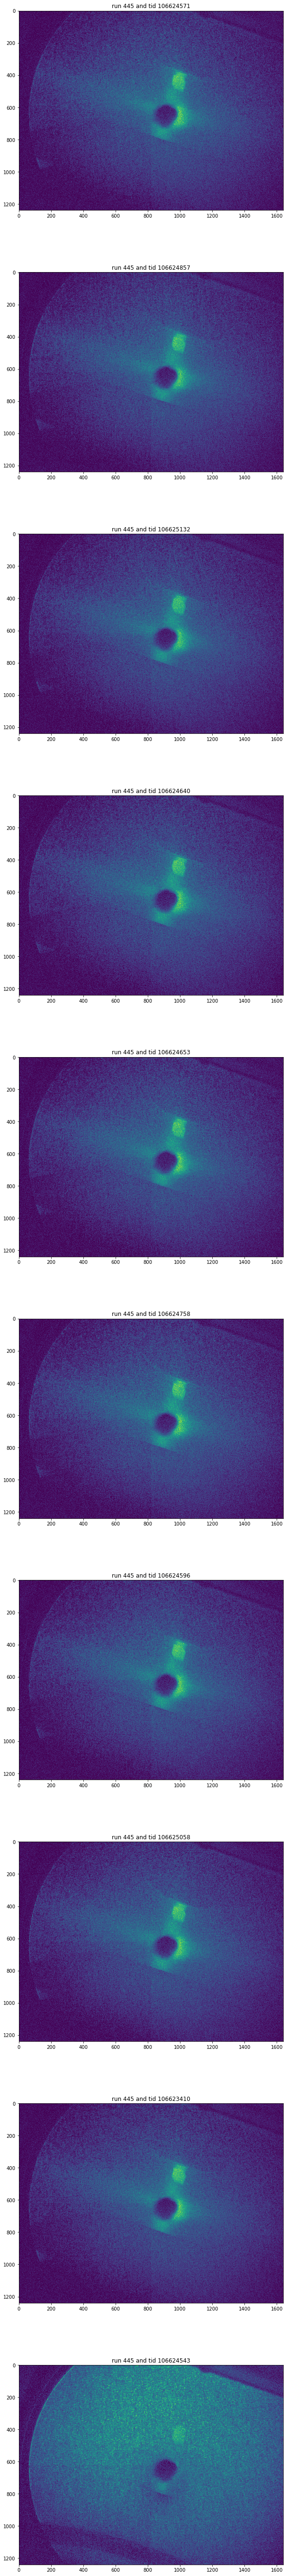

In [3]:
xfel.analyzeMaximumImages( runNumber=445, 
                        path='/gpfs/exfel/exp/SQS/201921/p002430/raw',
                        maskRadius=100,
                        nlargest=10 )

# Histogram to measure single photon level

In [3]:
runNum = 4
images, tids = xfel.allImages(runNum, path=methanePath)

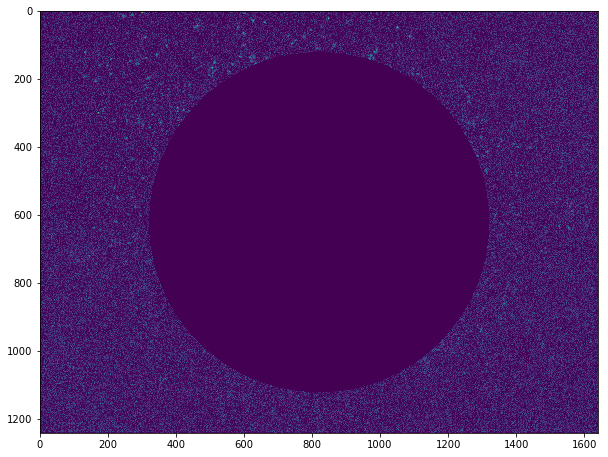

In [4]:
xfel.plotWithCircularMask( images[0,:,:].squeeze(), maskRadius=500 )

Text(0, 0.5, 'counts')

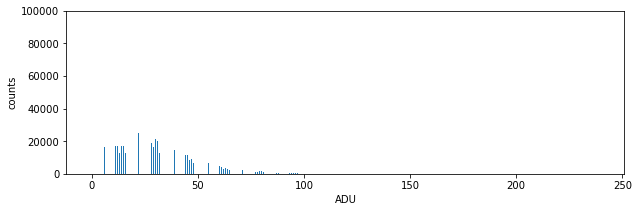

In [5]:
xfel.histWithCircularMask( images[3,:,:].squeeze(), maskRadius=500, nbins=1000 )
plt.ylim([0,1e5])
plt.xlabel('ADU')
plt.ylabel('counts')